In [1]:
from transformers import BertTokenizer

import gpt2_model
import lstm_model
from bert_model import Bert

/Users/kadirtayyiperkan/PycharmProjects/resume-model/.venv/lib/python3.8/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import stats

In [3]:
dataset_path = "../dataset/Resume.csv"
df = pd.read_csv(dataset_path)

In [4]:
print(df)

            ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
...        ...                                                ...   
2479  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
2480  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
2481  31605080           GEEK SQUAD AGENT         Professional...   
2482  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
2483  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
0     <div class="fontsize fontface vmargins hmargin...        HR  
1     <div class="fontsize fontface

In [5]:
df.loc[0, "Resume_str"]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [6]:
category = df["Category"].unique()

In [7]:
print("Categories: {}".format(", ".join(category)))

Categories: HR, DESIGNER, INFORMATION-TECHNOLOGY, TEACHER, ADVOCATE, BUSINESS-DEVELOPMENT, HEALTHCARE, FITNESS, AGRICULTURE, BPO, SALES, CONSULTANT, DIGITAL-MEDIA, AUTOMOBILE, CHEF, FINANCE, APPAREL, ENGINEERING, ACCOUNTANT, CONSTRUCTION, PUBLIC-RELATIONS, BANKING, ARTS, AVIATION


In [75]:
len(category)

24

In [8]:
stat = []
avg = 0
for cat in category:
    subset = df[df["Category"] == cat]
    stat.append({
        "Category": cat,
        "items": len(subset)
    })
    avg += len(subset)
avg /= len(category)
print(stat)


[{'Category': 'HR', 'items': 110}, {'Category': 'DESIGNER', 'items': 107}, {'Category': 'INFORMATION-TECHNOLOGY', 'items': 120}, {'Category': 'TEACHER', 'items': 102}, {'Category': 'ADVOCATE', 'items': 118}, {'Category': 'BUSINESS-DEVELOPMENT', 'items': 120}, {'Category': 'HEALTHCARE', 'items': 115}, {'Category': 'FITNESS', 'items': 117}, {'Category': 'AGRICULTURE', 'items': 63}, {'Category': 'BPO', 'items': 22}, {'Category': 'SALES', 'items': 116}, {'Category': 'CONSULTANT', 'items': 115}, {'Category': 'DIGITAL-MEDIA', 'items': 96}, {'Category': 'AUTOMOBILE', 'items': 36}, {'Category': 'CHEF', 'items': 118}, {'Category': 'FINANCE', 'items': 118}, {'Category': 'APPAREL', 'items': 97}, {'Category': 'ENGINEERING', 'items': 118}, {'Category': 'ACCOUNTANT', 'items': 118}, {'Category': 'CONSTRUCTION', 'items': 112}, {'Category': 'PUBLIC-RELATIONS', 'items': 111}, {'Category': 'BANKING', 'items': 115}, {'Category': 'ARTS', 'items': 103}, {'Category': 'AVIATION', 'items': 117}]


In [9]:
stats_df = pd.DataFrame(stat)

In [10]:
print(stats_df)

                  Category  items
0                       HR    110
1                 DESIGNER    107
2   INFORMATION-TECHNOLOGY    120
3                  TEACHER    102
4                 ADVOCATE    118
5     BUSINESS-DEVELOPMENT    120
6               HEALTHCARE    115
7                  FITNESS    117
8              AGRICULTURE     63
9                      BPO     22
10                   SALES    116
11              CONSULTANT    115
12           DIGITAL-MEDIA     96
13              AUTOMOBILE     36
14                    CHEF    118
15                 FINANCE    118
16                 APPAREL     97
17             ENGINEERING    118
18              ACCOUNTANT    118
19            CONSTRUCTION    112
20        PUBLIC-RELATIONS    111
21                 BANKING    115
22                    ARTS    103
23                AVIATION    117


In [11]:
z = np.abs(stats.zscore(stats_df["items"]))

In [12]:
print(z)

0     0.254657
1     0.137123
2     0.646438
3     0.058767
4     0.568082
5     0.646438
6     0.450548
7     0.528904
8     1.586711
9     3.193011
10    0.489726
11    0.450548
12    0.293835
13    2.644518
14    0.568082
15    0.568082
16    0.254657
17    0.568082
18    0.568082
19    0.333013
20    0.293835
21    0.450548
22    0.019589
23    0.528904
Name: items, dtype: float64


In [13]:
threshold = 1
outliers = stats_df[z > threshold]

print(outliers)

       Category  items
8   AGRICULTURE     63
9           BPO     22
13   AUTOMOBILE     36


In [14]:
df = df[~df.Category.isin(outliers.Category)]

In [15]:
stat = list(filter(lambda x: x['Category'] not in outliers.Category.to_list(), stat))

In [16]:
print(stat)

[{'Category': 'HR', 'items': 110}, {'Category': 'DESIGNER', 'items': 107}, {'Category': 'INFORMATION-TECHNOLOGY', 'items': 120}, {'Category': 'TEACHER', 'items': 102}, {'Category': 'ADVOCATE', 'items': 118}, {'Category': 'BUSINESS-DEVELOPMENT', 'items': 120}, {'Category': 'HEALTHCARE', 'items': 115}, {'Category': 'FITNESS', 'items': 117}, {'Category': 'SALES', 'items': 116}, {'Category': 'CONSULTANT', 'items': 115}, {'Category': 'DIGITAL-MEDIA', 'items': 96}, {'Category': 'CHEF', 'items': 118}, {'Category': 'FINANCE', 'items': 118}, {'Category': 'APPAREL', 'items': 97}, {'Category': 'ENGINEERING', 'items': 118}, {'Category': 'ACCOUNTANT', 'items': 118}, {'Category': 'CONSTRUCTION', 'items': 112}, {'Category': 'PUBLIC-RELATIONS', 'items': 111}, {'Category': 'BANKING', 'items': 115}, {'Category': 'ARTS', 'items': 103}, {'Category': 'AVIATION', 'items': 117}]


In [17]:
print(df['Category'].unique())

['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'SALES' 'CONSULTANT'
 'DIGITAL-MEDIA' 'CHEF' 'FINANCE' 'APPAREL' 'ENGINEERING' 'ACCOUNTANT'
 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING' 'ARTS' 'AVIATION']


In [18]:
print(df.loc[0, "Resume_str"])

         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss preve

In [19]:
def data_clean(row):
    text = row["Resume_str"]
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]', r' ', text)
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text.lower()

In [20]:
df["Cleaned_Resume"] = df.apply(data_clean, axis=1)

In [21]:
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kadirtayyiperkan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def clean_string(row, useless_words=None, stem="None"):
    if useless_words is None:
        useless_words = []
    text = row["Resume_str"]

    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]', r' ', text)
    text = re.sub('\s+', ' ', text)  # remove extra whitespace

    # Make lower
    text = text.lower()

    # Remove line breaks
    # Note: that this line can be augmented and used over
    # to replace any characters with nothing or a space
    text = re.sub(r'\n', '', text)

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Using the re.sub() method
    # Remove numbers from string 
    text = re.sub(r'[0-9]+', '', text)

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english") + useless_words
    useless_words = useless_words + ['hi', 'im']

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]

    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer()
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [23]:
df["Cleaned_Resume"] = df.apply(lambda x: clean_string(x), axis=1)

In [24]:
print(df["Cleaned_Resume"])

0       hr administrator marketing associate hr admini...
1       hr specialist us hr operations summary versati...
2       hr director summary years experience recruitin...
3       hr specialist summary dedicated driven dynamic...
4       hr manager skill highlights hr skills hr depar...
                              ...                        
2479    rank sgt e non commissioned officer charge bri...
2480    government relations communications organizati...
2481    geek squad agent professional profile support ...
2482    program director office manager summary highly...
2483    storekeeper ii professional summary purpose do...
Name: Cleaned_Resume, Length: 2363, dtype: object


In [25]:
print(df.loc[0, "Cleaned_Resume"])

hr administrator marketing associate hr administrator summary dedicated customer service manager years experience hospitality customer service management respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team management marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist omplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton worldwide general manager training certification omplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment experience hr administrator marketing associate hr administrator dec current company name city state helps develop poli

In [26]:
meaningless_values = ["city", "state", "name", "jan", "feb", "mar", "apr", "may", "jul", "jun", "aug", "sep", "oct",
                      "nov", "dec", "company", "skill"]

In [27]:
df["Cleaned_Resume"] = df.apply(lambda x: clean_string(x, meaningless_values), axis=1)

In [28]:
from collections import Counter
from wordcloud import WordCloud

In [29]:
def get_freq(data_frame):
    all_text = ' '.join(data_frame["Cleaned_Resume"].tolist())
    
    # Split the text into words
    words = all_text.split()
    
    # Count the frequency of each word
    word_freq = Counter(words)
    
    # Convert the Counter object to a DataFrame for better visualization
    word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
    
    # Sort the DataFrame by frequency in descending order
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
    
    return word_freq_df, all_text

In [30]:
def word_cloud(cleaned_sentences):
    wc = WordCloud(collocations=False, width=800, height=400, background_color='white').generate(cleaned_sentences)
    plt.figure(figsize=(12,6), dpi=300)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [31]:
word_freq_df, all_text = get_freq(df)

In [32]:
print(word_freq_df)

             Word  Frequency
0      management      11517
1           sales       8028
2        business       7551
3        customer       7489
4          skills       7342
...           ...        ...
36118    frosting          1
36119         ren          1
36120  waterproof          1
36121  waterworks          1
36122      unseat          1

[36123 rows x 2 columns]


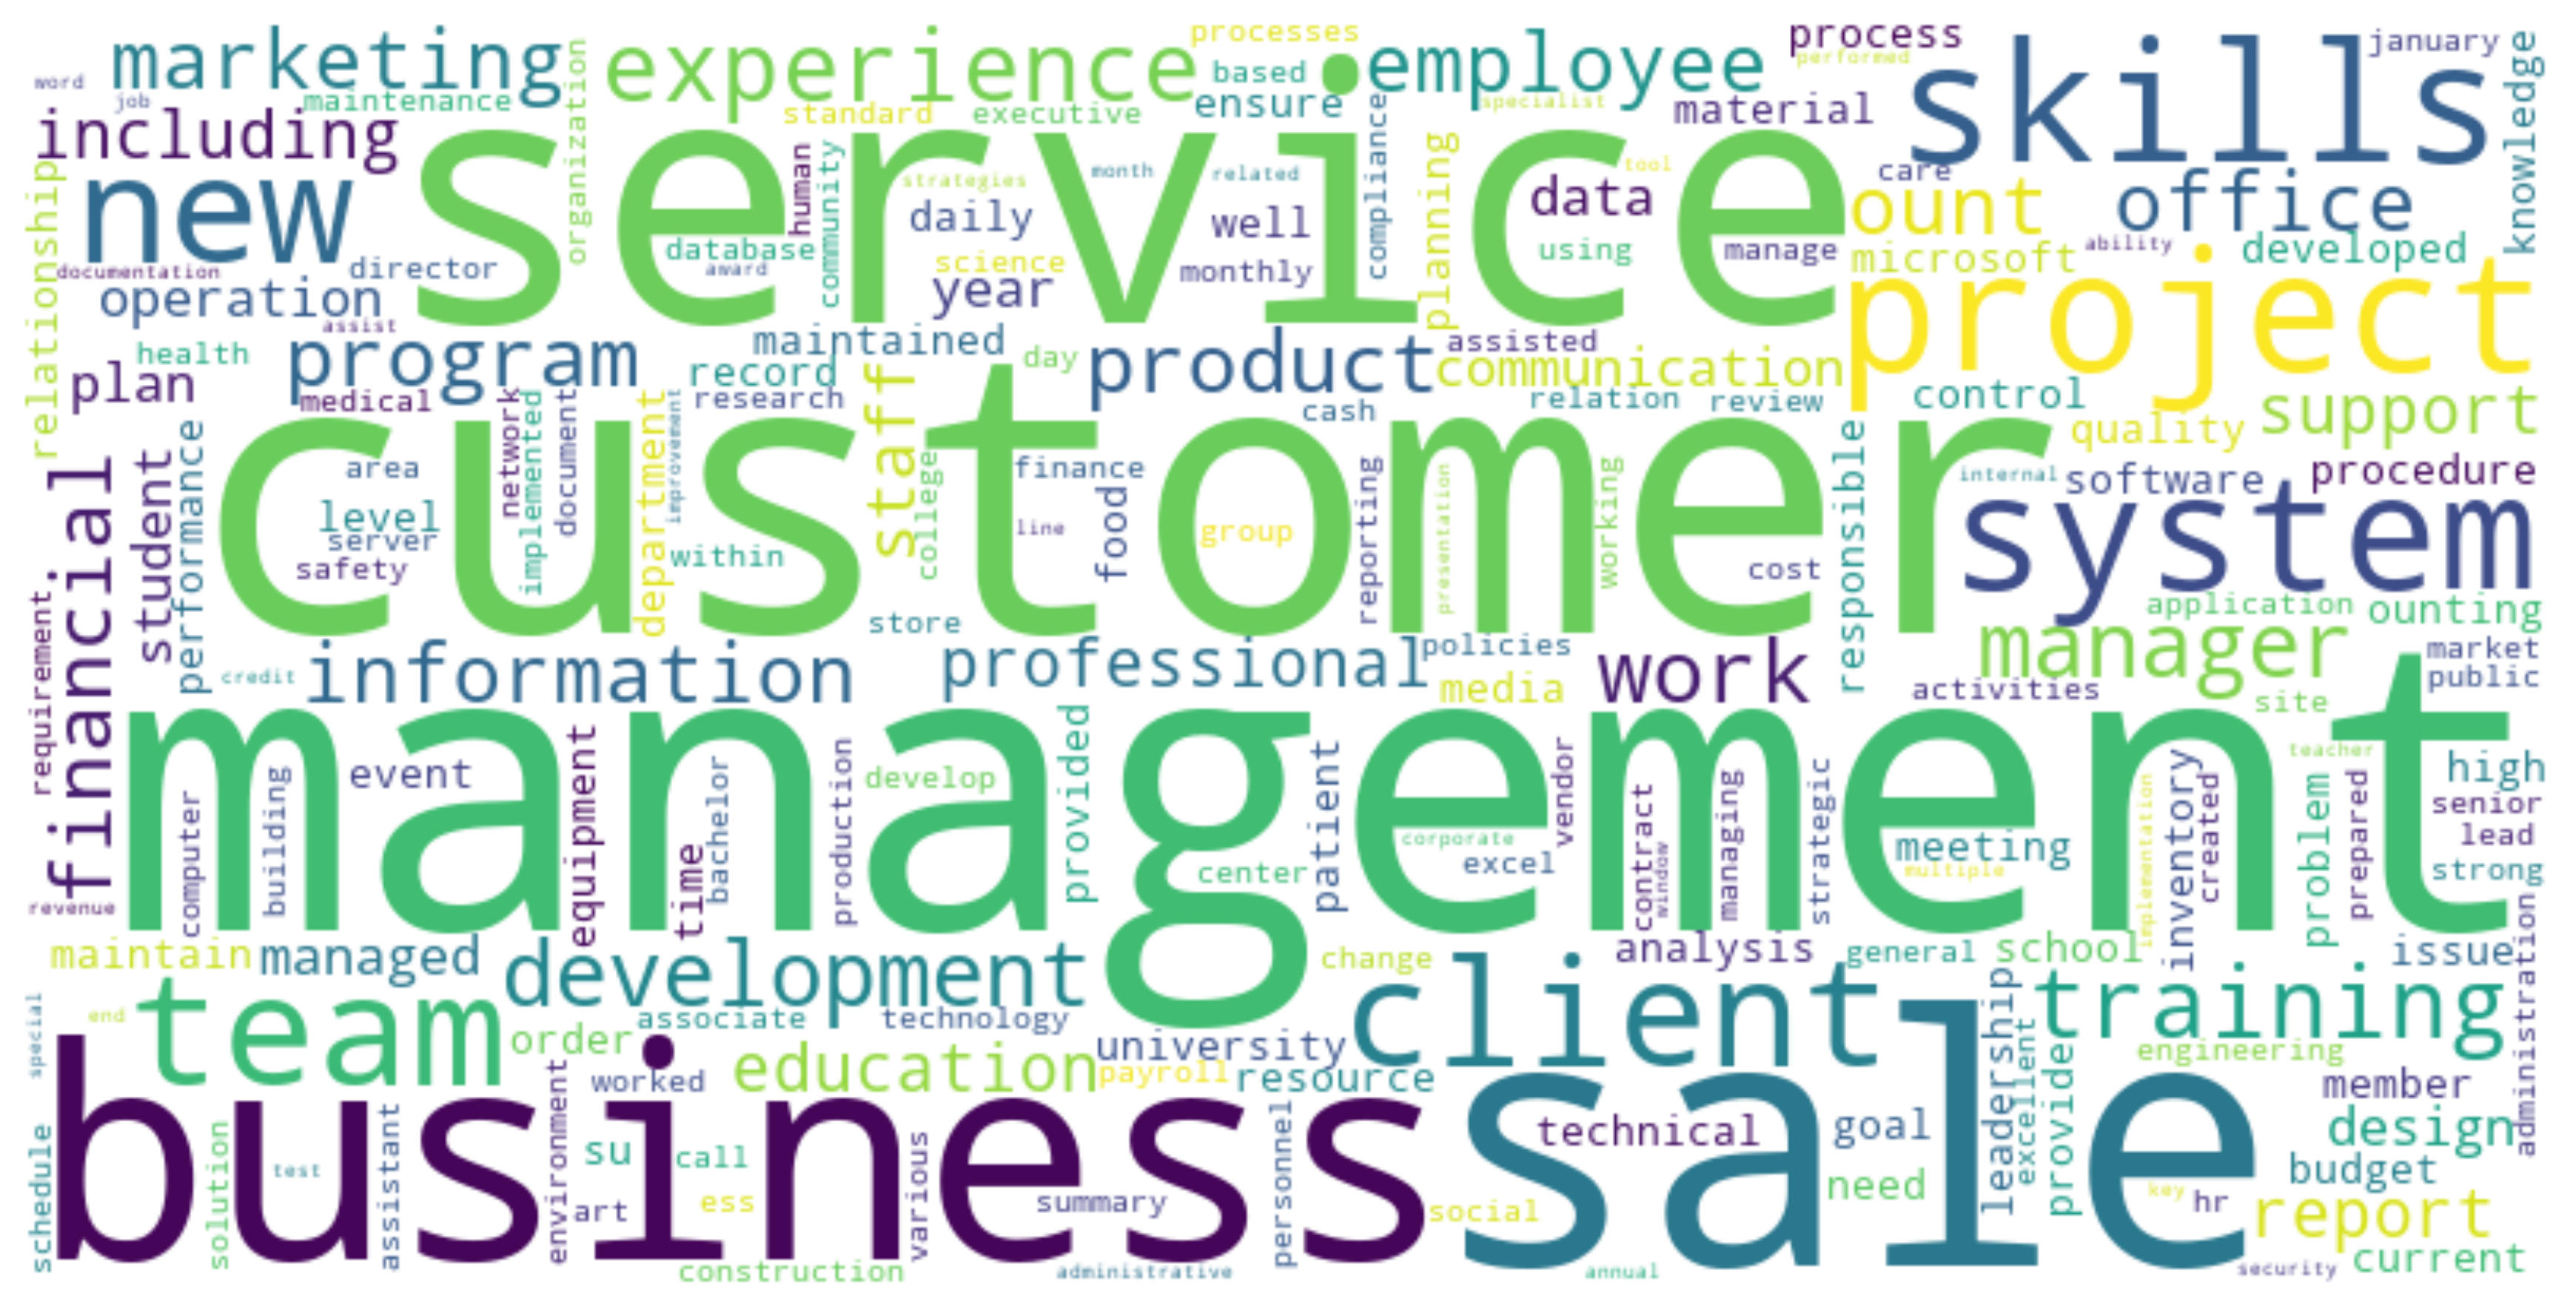

In [33]:
wc = WordCloud(collocations=False, width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12,6), dpi=300)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])
    
df.head(10)

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   
5  11592605           HR GENERALIST       Summary     Dedic...   
6  25824789           HR MANAGER       Summary    HUMAN RES...   
7  15375009           HR MANAGER         Professional Summa...   
8  11847784           HR SPECIALIST       Summary    Posses...   
9  32896934           HR CLERK       Summary    Translates ...   

                                         Resume_html Category  \
0  <div class="fontsize fontface vmargins hmargin...       HR   
1  <div class="fontsize fontface vmargins hmargin...       HR   
2  <div class="fontsize fontface vmargins hmargin...       HR   
3  <div class="fontsize fontface vmargins hmargin...       HR   
4  <div class="fontsize fontface vmargins hmargin...       HR   
5  <div class="fontsize fontface vmargins hmargin...       HR   
6  <div class="fontsize fontface vmargins hmargin...       HR   
7  <div class="fontsize fontface vmargins hmargin...       HR   
8  <div class="fontsize fontface vmargins hmargin...       HR   
9  <div class="fontsize fontface vmargins hmargin...       HR   

                                      Cleaned_Resume  Category_encoded  
0  hr administrator marketing associate hr admini...                16  
1  hr specialist us hr operations summary versati...                16  
2  hr director summary years experience recruitin...                16  
3  hr specialist summary dedicated driven dynamic...                16  
4  hr manager highlights hr skills hr department ...                16  
5  hr generalist summary dedicated focused admini...                16  
6  hr manager summary human resources manager ext...                16  
7  hr manager professional summary senior hr prof...                16  
8  hr specialist summary possess years experience...                16  
9  hr clerk summary translates business vision hr...                16

In [36]:
text = df['Cleaned_Resume'].values
target = df['Category'].values
df['label'] = df['Category'].astype('category').cat.codes

word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    stop_words = 'english'
)

word_vectorizer.fit(text)
word_features = word_vectorizer.transform(text)

print("Feature processing completed..")

Feature processing completed..


In [37]:
from sklearn.model_selection import train_test_split

train_texts, val_test_texts, train_labels, val_test_labels = train_test_split(text, df['label'], test_size=0.2, random_state=42, shuffle=True, stratify=target)
val_texts, test_texts, val_labels, test_labels = train_test_split(val_test_texts, val_test_labels, test_size=0.5)

In [38]:
num_labels = len(np.unique(target))

In [39]:
from transformers import DistilBertTokenizer, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=512)

In [40]:
print(train_texts)

['hr senior specialist career overview dedicated service representative professional motivated maintain customer satisfaction contribute su ess core strengths excel data entry systems outlook microsoft systems amisys ess able master process apply new skills concepts quickly customer service expert telephone inquiries specialist courteous demeanor omplishments customer assistance worked systems live support diligently completed assigned tasks working overtime needed customer service researched calmed rapidly resolved client conflicts prevent loss key ounts work experience hr senior specialist current health insurance benefit specialist administrative xerox corporation xerox leader bpo outsourcing across variety industries public sector thousands companies rely xerox help improve processes manage client operations focus core business duties provide administrative support functions relating personnel retirement benefits special projects specific responsibilities assist participants questi

In [41]:
from base_classes import TextDataset

In [42]:
train_dataset = TextDataset(train_encodings, train_labels.tolist())
val_dataset = TextDataset(val_encodings, val_labels.tolist())
test_dataset = TextDataset(test_encodings, test_labels.tolist())

In [43]:
bert = Bert(num_labels=num_labels)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/kadirtayyiperkan/PycharmProjects/resume-model/.venv/lib/python3.8/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [44]:
bert.set_trainer(train_dataset, val_dataset)

In [45]:
bert_trainer = bert.trainer
bert_trainer.train()

AttributeError: 'Trainer' object has no attribute 'save_weights'

In [46]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, accuracy_score

experiment_stats = []
experiment_label_stats = []

def loss_graph(trainer):
    train_loss = [log["loss"] for log in trainer.state.log_history if "loss" in log]
    eval_loss = [log["eval_loss"] for log in trainer.state.log_history if "eval_loss" in log]
    epoch_labels = [i+1 for i in range(3)]
    plt.plot(epoch_labels, train_loss, label="Train loss")
    plt.plot(epoch_labels, eval_loss, label="Validation loss")
    plt.legend()
    plt.show()
    return train_loss, eval_loss

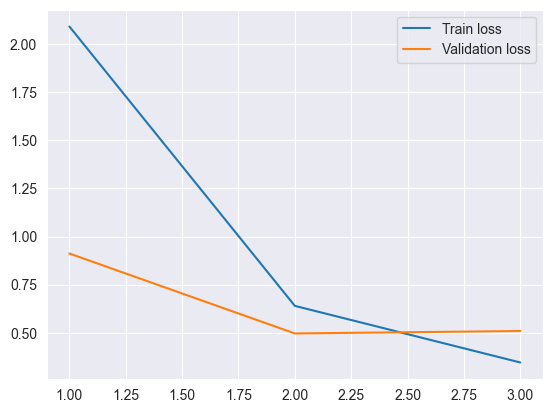

In [47]:
train_loss, eval_loss = loss_graph(bert_trainer)

In [48]:
def acc_graph(trainer, train_loss, eval_loss):
    predict = [np.argmax(item) for item in trainer.predict(test_dataset)[0]]
    # Calculate metrics
    original = test_labels.to_list()
    p, r, f, _ = precision_recall_fscore_support(original, predict, average='weighted')
    acc = accuracy_score(original, predict)
    run_stats = {
        "Precision": p,
        "Recall": r,
        "F-score": f,
        "Accuracy": acc,
        "Train Loss": train_loss[-1],
        "Validation Loss": eval_loss[-1]
    }
    return run_stats

In [50]:
bert_stats = acc_graph(bert_trainer, train_loss, eval_loss)

In [51]:
print(pd.DataFrame([bert_stats]))

   Precision    Recall   F-score  Accuracy  Train Loss  Validation Loss
0     0.9234  0.919831  0.918041  0.919831      0.3455         0.509083


In [54]:
bert_trainer.save_model("bert_model")

In [55]:
def show_acc_graph(run_stats, original, predict):
    experiment_stats.append(run_stats)
    # Calculate per-label metrics
    run_label_stats = []
    p, r, f, _ = precision_recall_fscore_support(original, predict, average=None)
    for j in range(len(test_labels)):
        label_predict = [predict[k] for k in range(len(original)) if original[k] == j]
        label_original = [j] * len(label_predict)
        acc = accuracy_score(label_original, label_predict)
        label_stats = {
            "Precision": p[j],
            "Recall": r[j],
            "F-score": f[j],
            "Accuracy": acc
        }
        run_label_stats.append(label_stats)
    experiment_label_stats.append(run_label_stats)
    # Plot confusion matrix
    cm = confusion_matrix(original, predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [56]:
from notebooks.gpt2_model import GPT2

gpt2 = GPT2(num_labels=num_labels)
gpt2.set_trainer(train_dataset, val_dataset)

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/kadirtayyiperkan/PycharmProjects/resume-model/.venv/lib/python3.8/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [57]:
gpt2_trainer = gpt2.trainer
gpt2_trainer.train()
gpt2_trainer.save_model('gpt2')

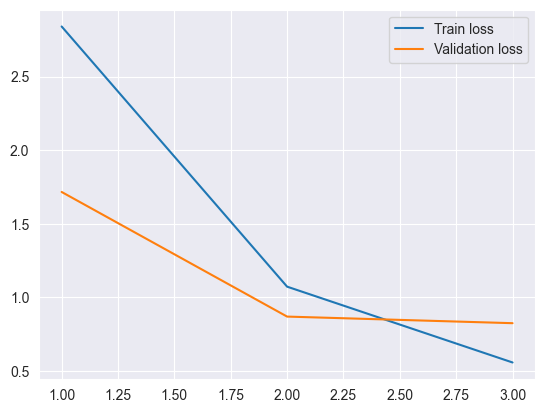

In [58]:
train_loss, eval_loss = loss_graph(gpt2_trainer)

In [59]:
df_rs = acc_graph(gpt2_trainer, train_loss, eval_loss)

In [60]:
print(pd.DataFrame([df_rs]))

   Precision    Recall   F-score  Accuracy  Train Loss  Validation Loss
0   0.861656  0.852321  0.853058  0.852321      0.5584         0.825181


In [61]:
from lstm_model import LSTMModel
lstm = LSTMModel(num_labels=num_labels)

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Cleaned_Resume'].values)
sequences = tokenizer.texts_to_sequences(df['Cleaned_Resume'].values)

# Pad the sequences
X = pad_sequences(sequences, maxlen=100)
y = to_categorical(df['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
history = lstm.model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
48/48 [==============================] - 6s 102ms/step - loss: 3.0430 - accuracy: 0.0562 - val_loss: 3.0249 - val_accuracy: 0.0661
Epoch 2/10
48/48 [==============================] - 4s 90ms/step - loss: 2.8790 - accuracy: 0.1257 - val_loss: 2.8804 - val_accuracy: 0.1217
Epoch 3/10
48/48 [==============================] - 4s 92ms/step - loss: 2.5909 - accuracy: 0.1819 - val_loss: 2.8130 - val_accuracy: 0.1323
Epoch 4/10
48/48 [==============================] - 4s 93ms/step - loss: 2.3613 - accuracy: 0.2394 - val_loss: 2.7517 - val_accuracy: 0.1561
Epoch 5/10
48/48 [==============================] - 5s 95ms/step - loss: 2.1587 - accuracy: 0.2758 - val_loss: 2.8510 - val_accuracy: 0.1614
Epoch 6/10
48/48 [==============================] - 5s 95ms/step - loss: 1.9539 - accuracy: 0.3340 - val_loss: 2.8655 - val_accuracy: 0.1720
Epoch 7/10
48/48 [==============================] - 4s 92ms/step - loss: 1.7477 - accuracy: 0.4001 - val_loss: 3.1097 - val_accuracy: 0.1984
Epoch 8/10
4

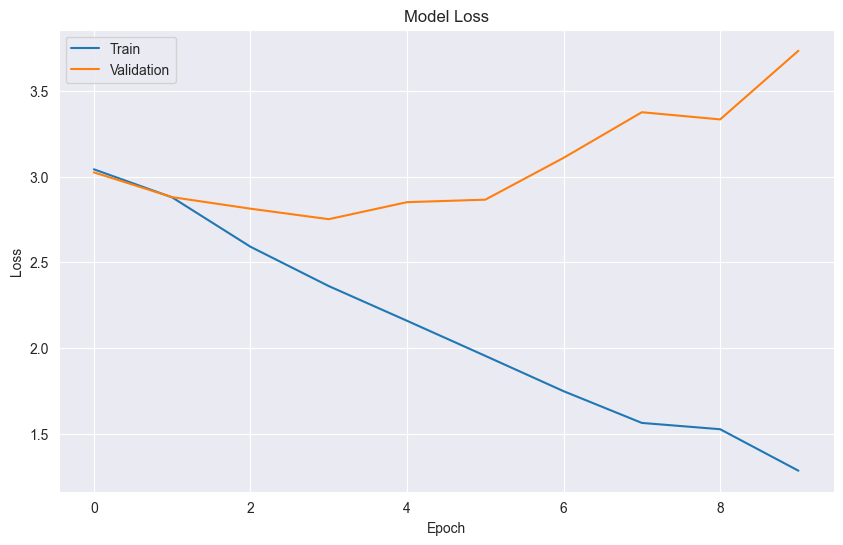

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

15/15 [==============================] - 0s 28ms/step - loss: 3.8286 - accuracy: 0.1734
Test Loss: 3.828594923019409
Test Accuracy: 17.34%
15/15 [==============================] - 1s 24ms/step
Accuracy: 17.34%
Precision: 17.08%
Recall: 17.34%
F1 Score: 16.55%


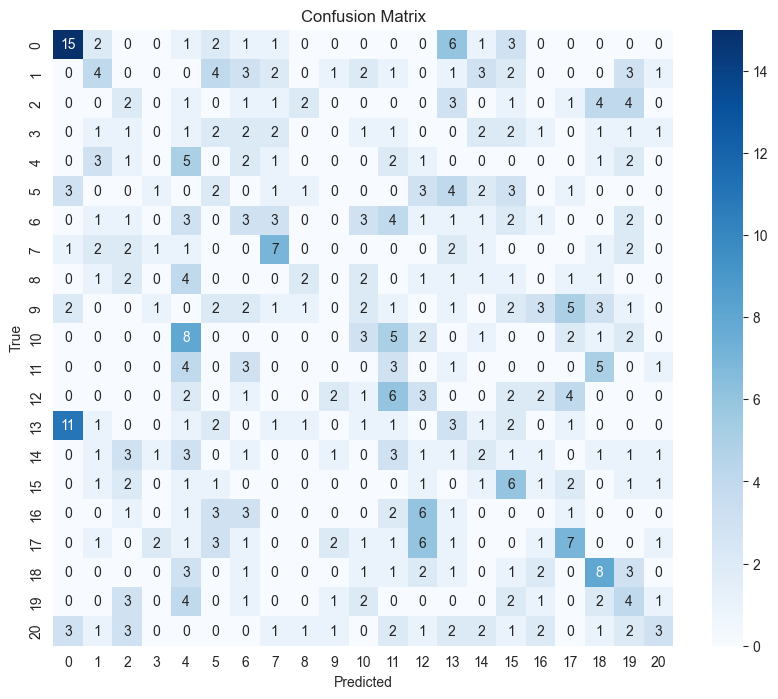

TypeError: object of type 'numpy.int8' has no len()

In [65]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns

loss, accuracy = lstm.model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Make predictions
y_pred_probs = lstm.model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print(report)

In [66]:
df['label'] = label_encoder.fit_transform(df['Category'])

# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['Cleaned_Resume'], df['label'], test_size=0.2, random_state=42)

In [67]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts).toarray()
X_test = vectorizer.transform(test_texts).toarray()

In [68]:
from sklearn.naive_bayes import MultinomialNB
import joblib

nb_model = MultinomialNB()
nb_model.fit(X_train, train_labels)
joblib.dump(nb_model, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

Naive Bayes Accuracy: 17.34%
Precision: 66.06%
Recall: 57.72%
F1 Score: 55.47%


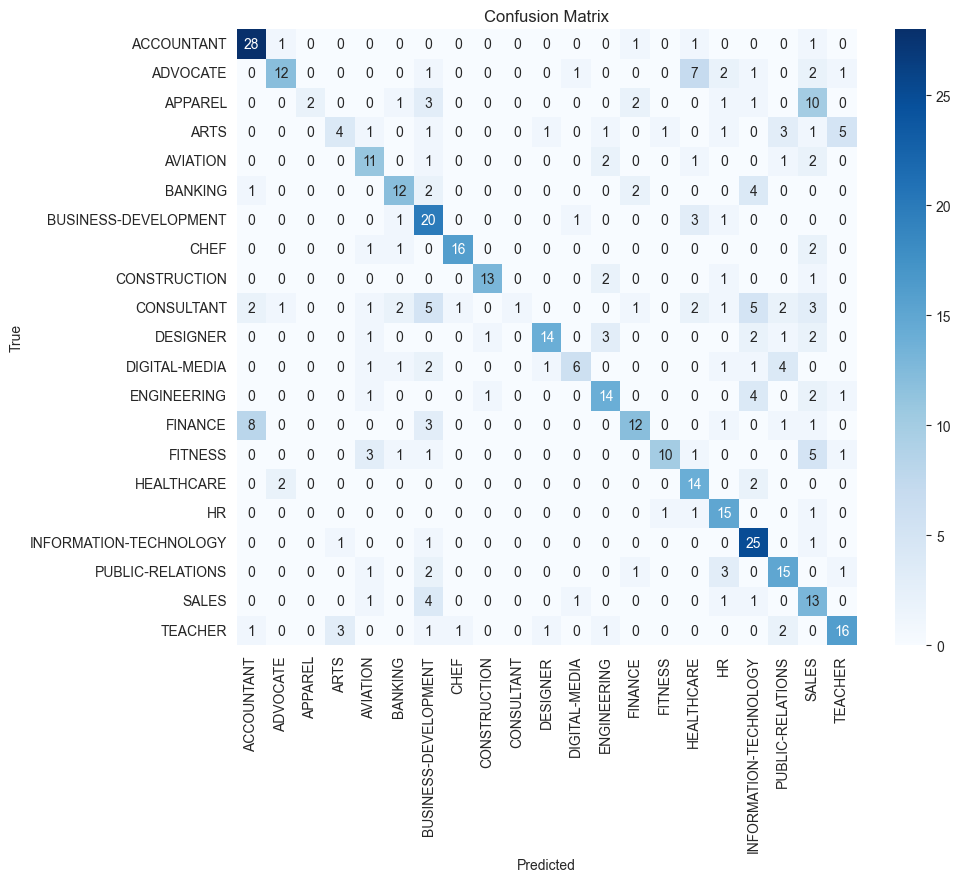

In [69]:
from sklearn.metrics import classification_report

nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(test_labels, nb_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, nb_predictions, average='weighted')

print(f'Naive Bayes Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

conf_matrix = confusion_matrix(test_labels, nb_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [70]:
print(classification_report(test_labels, nb_predictions, target_names=label_encoder.classes_))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.70      0.88      0.78        32
              ADVOCATE       0.75      0.44      0.56        27
               APPAREL       1.00      0.10      0.18        20
                  ARTS       0.50      0.21      0.30        19
              AVIATION       0.50      0.61      0.55        18
               BANKING       0.63      0.57      0.60        21
  BUSINESS-DEVELOPMENT       0.43      0.77      0.55        26
                  CHEF       0.89      0.80      0.84        20
          CONSTRUCTION       0.87      0.76      0.81        17
            CONSULTANT       1.00      0.04      0.07        27
              DESIGNER       0.82      0.58      0.68        24
         DIGITAL-MEDIA       0.67      0.35      0.46        17
           ENGINEERING       0.61      0.61      0.61        23
               FINANCE       0.63      0.46      0.53        26
               FITNESS       0.83      

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, train_labels)
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


KNN Accuracy: 51.80%
Precision: 55.09%
Recall: 51.80%
F1 Score: 51.64%


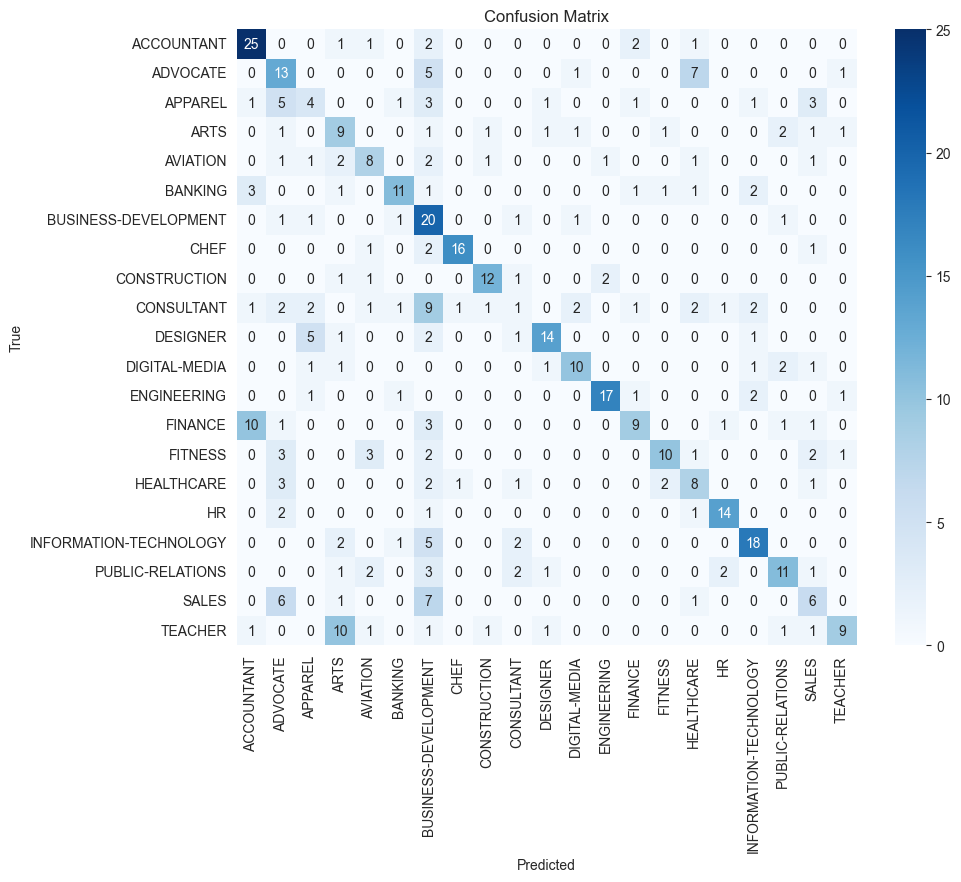

In [72]:

# Predict and evaluate KNN model
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(test_labels, knn_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, knn_predictions, average='weighted')

print(f'KNN Accuracy: {knn_accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

conf_matrix = confusion_matrix(test_labels, knn_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [73]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, train_labels)
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

SVM Accuracy: 64.90%
Precision: 67.34%
Recall: 64.90%
F1 Score: 64.65%


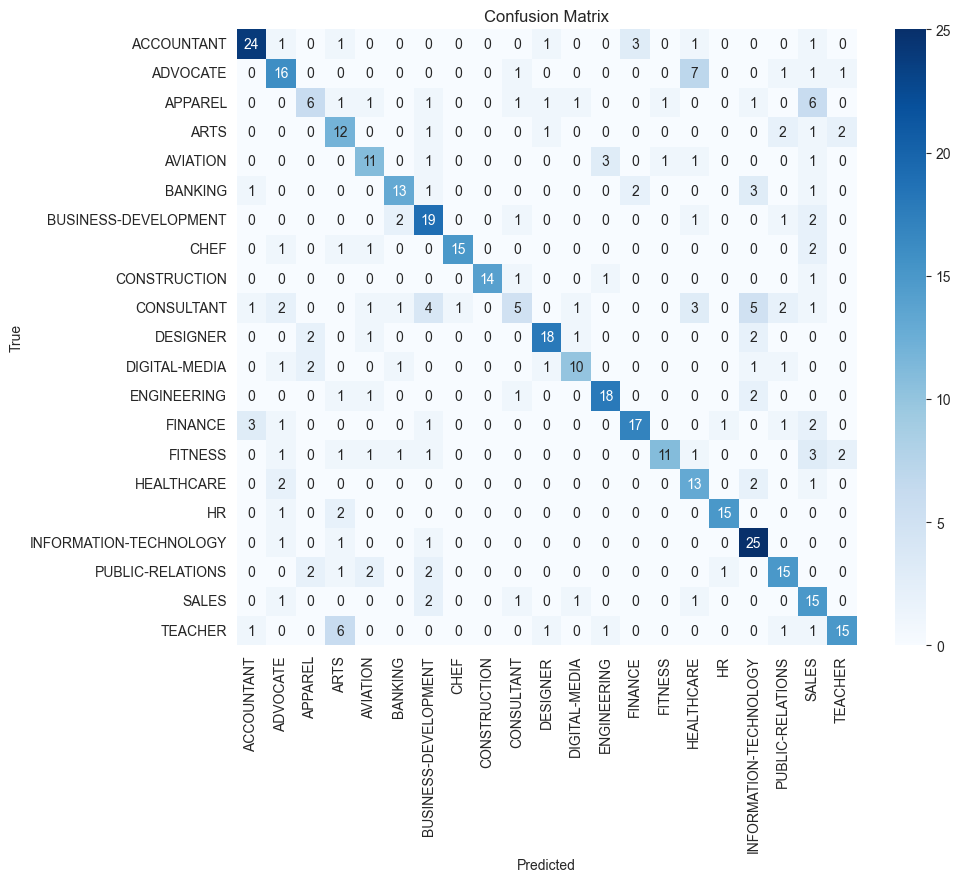

In [74]:
# Predict and evaluate SVM model
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(test_labels, svm_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, svm_predictions, average='weighted')

print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

conf_matrix = confusion_matrix(test_labels, svm_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()